In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import lightgbm as lgb

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0, 1), copy=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import missingno as msno
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# Import data

In [2]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 600)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
sample_submission = pd.read_csv("/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv")
train = pd.read_csv("/kaggle/input/tabular-playground-series-may-2022/train.csv")
test = pd.read_csv("/kaggle/input/tabular-playground-series-may-2022/test.csv")

In [4]:
sample_submission.head()

,id,target
0,900000,0.50000
1,900001,0.50000
2,900002,0.50000
3,900003,0.50000
4,900004,0.50000


In [5]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      700000 non-null  int64  
 1   target  700000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 10.7 MB


In [6]:
sample_submission.describe()

,id,target
count,700000.00000,700000.00000
mean,1249999.50000,0.50000
std,202072.73855,0.00000
min,900000.00000,0.50000
25%,1074999.75000,0.50000
50%,1249999.50000,0.50000
75%,1424999.25000,0.50000
max,1599999.00000,0.50000


In [7]:
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.37325,0.23889,-0.24338,0.56740,-0.64771,0.83933,0.11313,1,5,1,3,3,3,1,6,1,0,7,4,0.29822,-0.91972,3.05854,-2.54074,0.76695,-2.73063,-0.20818,1.36340,ABABDADBAB,67.60915,0,0,0
1,1,1.69702,-1.71032,-2.23033,-0.54566,1.11317,-1.55217,0.44783,1,3,4,0,2,3,0,1,0,4,6,0,-3.14767,-1.07543,2.17905,2.27831,-0.63366,-1.21708,-3.78219,-0.05832,ACACCADCEB,377.09642,0,0,1
2,2,1.68173,0.61675,-1.02769,0.81049,-0.60909,0.11397,-0.70866,1,0,2,6,6,4,3,1,2,2,1,4,2.82073,-3.48534,-0.78424,-1.38578,-0.52056,-0.00912,2.78854,-3.70349,AAAEABCKAD,-195.59970,0,2,1
3,3,-0.11817,-0.58783,-0.80464,2.08682,0.37101,-0.12883,-0.28258,3,2,1,0,1,6,4,2,3,3,0,3,1.08108,-2.10018,-2.34382,0.57259,-1.65321,1.68603,-2.53310,-0.60860,BDBBAACBCB,210.82621,0,0,1
4,4,1.14848,-0.17657,-0.66487,-1.10134,0.46788,0.50012,0.40752,3,3,0,4,3,0,6,0,3,3,1,0,-0.12618,0.60503,1.13367,-3.91293,-1.43037,2.12765,-3.30678,4.37137,BDBCBBCHFE,-217.21180,0,1,1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [9]:
train

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.37325,0.23889,-0.24338,0.56740,-0.64771,0.83933,0.11313,1,5,1,3,3,3,1,6,1,0,7,4,0.29822,-0.91972,3.05854,-2.54074,0.76695,-2.73063,-0.20818,1.36340,ABABDADBAB,67.60915,0,0,0
1,1,1.69702,-1.71032,-2.23033,-0.54566,1.11317,-1.55217,0.44783,1,3,4,0,2,3,0,1,0,4,6,0,-3.14767,-1.07543,2.17905,2.27831,-0.63366,-1.21708,-3.78219,-0.05832,ACACCADCEB,377.09642,0,0,1
2,2,1.68173,0.61675,-1.02769,0.81049,-0.60909,0.11397,-0.70866,1,0,2,6,6,4,3,1,2,2,1,4,2.82073,-3.48534,-0.78424,-1.38578,-0.52056,-0.00912,2.78854,-3.70349,AAAEABCKAD,-195.59970,0,2,1
3,3,-0.11817,-0.58783,-0.80464,2.08682,0.37101,-0.12883,-0.28258,3,2,1,0,1,6,4,2,3,3,0,3,1.08108,-2.10018,-2.34382,0.57259,-1.65321,1.68603,-2.53310,-0.60860,BDBBAACBCB,210.82621,0,0,1
4,4,1.14848,-0.17657,-0.66487,-1.10134,0.46788,0.50012,0.40752,3,3,0,4,3,0,6,0,3,3,1,0,-0.12618,0.60503,1.13367,-3.91293,-1.43037,2.12765,-3.30678,4.37137,BDBCBBCHFE,-217.21180,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,899995,1.38014,-0.03888,0.59711,0.85456,0.68430,-1.05862,1.31070,2,1,2,0,0,5,3,0,2,0,0,2,-4.06137,-2.64365,-2.17385,-1.59474,0.52202,0.83305,2.71413,1.29009,BABBCBBBED,455.03385,0,2,1
899996,899996,-1.36979,0.04484,0.01546,0.37656,-0.38053,-0.83081,-1.79846,4,1,2,4,3,1,4,1,2,2,0,0,-1.72198,0.74179,-5.19060,2.41390,-0.67494,-0.41211,-0.03044,-3.14405,BBBGBBDQBE,134.70358,0,1,0
899997,899997,1.38620,-0.96115,0.72599,-0.13284,0.87391,-0.24534,-1.04579,0,0,6,4,1,3,1,2,3,2,3,0,-1.26582,1.23001,-1.36183,-0.15193,-4.56077,-1.24915,1.79354,2.25370,AEBEDBBHBA,-99.53631,0,1,0
899998,899998,-1.59057,-0.50994,-1.71540,-0.24999,1.35993,1.65081,-0.05859,0,2,2,2,2,2,1,2,2,2,2,5,1.03525,2.45081,-2.57782,2.42367,2.11001,0.56127,-2.14961,1.01998,ADBAAADDAE,47.82304,1,2,0


In [10]:
test.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.44252,0.17438,-0.99982,0.76274,0.18678,-1.07477,0.50189,6,6,0,0,0,5,1,1,2,2,0,1,-1.12837,2.74935,-1.00640,-1.19388,-2.43574,-2.42743,-1.96689,5.73420,BAAABADLAC,99.47842,0,0
1,900001,-0.60560,-0.30571,0.62767,-0.57890,-1.75093,1.35555,-0.19091,1,3,4,0,2,1,3,0,0,0,2,0,-4.42410,1.08076,2.38240,0.14944,1.88332,-2.84871,-0.72515,3.19422,AFABBAEGCB,-65.99383,1,0
2,900002,0.30399,2.44511,0.24651,0.81825,0.35973,-1.33185,1.35862,3,3,4,1,1,3,2,2,4,1,0,3,-1.52386,-1.40671,-7.02610,1.31228,-5.15719,1.71400,0.58503,0.06690,BBACABBKEE,-87.40562,0,1
3,900003,0.15405,0.26013,-1.36709,-0.09318,-1.11103,-0.94848,1.11922,0,0,4,2,1,5,0,3,3,1,4,2,-1.40460,3.01108,-0.59453,-3.93948,1.75457,-2.36401,-1.00332,3.89310,AEBEAACQCC,-281.29346,0,0
4,900004,-1.65190,-0.42427,-0.66736,-0.32212,-0.08946,0.18171,1.78498,2,2,2,0,0,3,0,1,2,0,2,2,-1.96852,0.10059,0.08491,-0.98574,-0.13047,-3.55789,1.21069,1.86188,AEBBBBDABF,25.62942,0,2


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      700000 non-null  int64  
 1   f_00    700000 non-null  float64
 2   f_01    700000 non-null  float64
 3   f_02    700000 non-null  float64
 4   f_03    700000 non-null  float64
 5   f_04    700000 non-null  float64
 6   f_05    700000 non-null  float64
 7   f_06    700000 non-null  float64
 8   f_07    700000 non-null  int64  
 9   f_08    700000 non-null  int64  
 10  f_09    700000 non-null  int64  
 11  f_10    700000 non-null  int64  
 12  f_11    700000 non-null  int64  
 13  f_12    700000 non-null  int64  
 14  f_13    700000 non-null  int64  
 15  f_14    700000 non-null  int64  
 16  f_15    700000 non-null  int64  
 17  f_16    700000 non-null  int64  
 18  f_17    700000 non-null  int64  
 19  f_18    700000 non-null  int64  
 20  f_19    700000 non-null  float64
 21  f_20    70

In [12]:
test.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30
count,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000
mean,1249999.50000,-0.00009,-0.00073,-0.00039,0.00071,0.00080,-0.00047,0.00255,2.03082,2.05692,2.36119,2.17704,1.80566,2.84274,2.23853,1.51572,2.10039,2.09391,1.85831,2.06811,0.30728,-0.17397,-0.15394,-0.00562,-0.37198,-0.34068,0.17424,0.35629,0.60421,0.34609,1.00308
std,202072.73855,1.00026,0.99713,1.00032,1.00176,0.99909,1.00025,0.99954,1.65591,1.59173,1.63669,1.64509,1.53880,1.76083,1.53697,1.36239,1.56900,1.56060,1.46849,1.56425,2.31493,2.39794,2.48420,2.45091,2.45262,2.38894,2.41756,2.47771,238.88899,0.47572,0.81967
min,900000.00000,-4.65802,-4.92272,-4.45756,-4.56742,-4.67530,-5.14136,-4.78216,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-11.41902,-11.08991,-12.18678,-11.70081,-12.10448,-11.83842,-13.31278,-13.46249,-1204.24372,0.00000,0.00000
25%,1074999.75000,-0.67571,-0.67404,-0.67596,-0.67456,-0.67470,-0.67444,-0.67148,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,-1.23738,-1.79476,-1.81674,-1.64103,-2.02134,-1.94892,-1.44382,-1.26399,-158.66092,0.00000,0.00000
50%,1249999.50000,-0.00039,-0.00024,-0.00072,-0.00029,0.00028,-0.00167,0.00262,2.00000,2.00000,2.00000,2.00000,2.00000,3.00000,2.00000,1.00000,2.00000,2.00000,2.00000,2.00000,0.32650,-0.18494,-0.14910,0.03373,-0.39628,-0.33943,0.16523,0.39998,0.67139,0.00000,1.00000
75%,1424999.25000,0.67579,0.67142,0.67310,0.67638,0.67454,0.67415,0.67659,3.00000,3.00000,3.00000,3.00000,3.00000,4.00000,3.00000,2.00000,3.00000,3.00000,3.00000,3.00000,1.87426,1.44710,1.50805,1.66415,1.25136,1.26988,1.79443,2.02516,159.78901,1.00000,2.00000
max,1599999.00000,5.76195,4.76807,4.59990,4.89990,4.49431,4.70100,4.67315,16.00000,13.00000,16.00000,15.00000,14.00000,15.00000,13.00000,12.00000,14.00000,13.00000,13.00000,13.00000,11.78043,10.69137,11.99949,10.99160,11.36665,10.23655,11.29434,12.81198,1141.95733,1.00000,2.00000


# EDA

In [13]:
# Colors to be used for plots
colors = ["lightcoral", "sandybrown", "darkorange", "mediumseagreen", "lightseagreen",
          "cornflowerblue", "mediumpurple", "palevioletred", "lightskyblue", "sandybrown",
          "yellowgreen", "indianred", "lightsteelblue", "mediumorchid", "deepskyblue"]

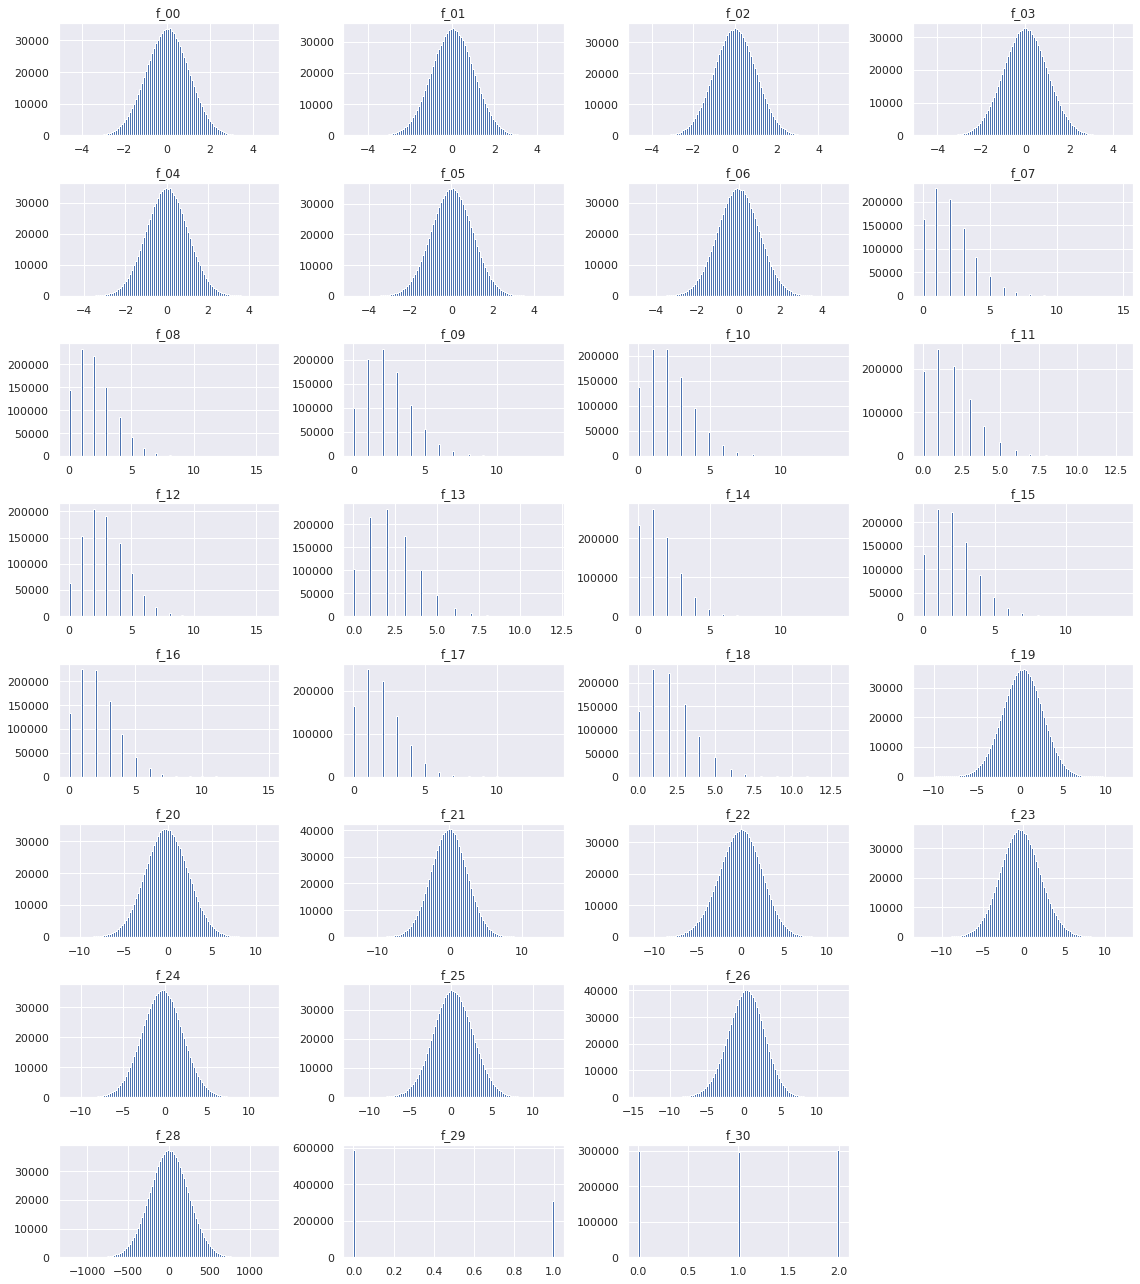

In [14]:
figure = plt.figure(figsize=(16, 18))
for feat in range(31):
    feat_name = f'f_{feat:02d}'
    if(feat_name != 'f_27'):
        plt.subplot(8, 4, feat+1)
        plt.hist(train[feat_name], bins=100)
        plt.title(f'{feat_name}')
figure.tight_layout(h_pad=1.0, w_pad=0.8)
plt.show()